In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scy

In [20]:
GM=1.0

Xi = 0.1786178958448091
Lambda = -0.2123418310626054
Chi = -0.06626458266981849

class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
    self.F=np.array([0,0,0])
    
  def CalculeFuerza(self):
    aux=-GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
          
  def Mueva_r(self, dt, Theta):
    self.r = self.r + self.V*(Theta*dt)

  def Mueva_V(self, dt, Theta):
    self.V = self.V + self.F*(Theta*dt/self.m)

      
      

In [21]:
#Condiciones Inicia;es
dt=1e-1
Nsteps=int(1e5)
StepsPerFrame=int(1e0)
Nframes=Nsteps//StepsPerFrame
r0 =10

In [22]:
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nframes)
ydata=np.zeros(Nframes)
Planeta=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)



for i in range(Nsteps):
    t=i*dt
    if(i%StepsPerFrame==0):
        k = i//StepsPerFrame
        xdata[k]=Planeta.r[0]
        ydata[k]=Planeta.r[1]
        
    Planeta.Mueva_r(dt,Xi)
    Planeta.CalculeFuerza()
    Planeta.Mueva_V(dt,1-2*Lambda)
    
    Planeta.Mueva_r(dt,Chi)
    Planeta.CalculeFuerza()
    Planeta.Mueva_V(dt,Lambda)

    Planeta.Mueva_r(dt,Chi)
    Planeta.CalculeFuerza()
    Planeta.Mueva_V(dt,1 - 2.0*Lambda)

    Planeta.Mueva_r(dt,Xi)

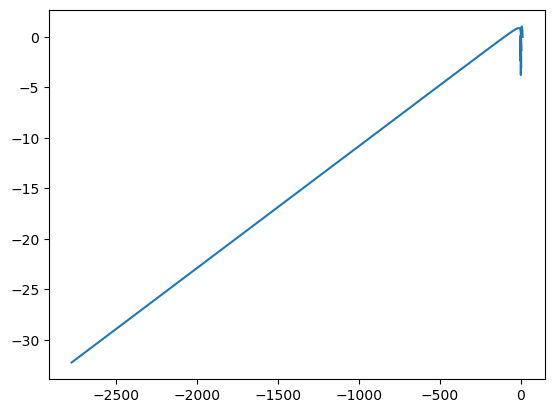

In [23]:
plt.plot(xdata,ydata)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\cterr\AppData\Local\Temp\ipykernel_11172\179045003.py:10: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


ValueError: unknown file extension: .mp4

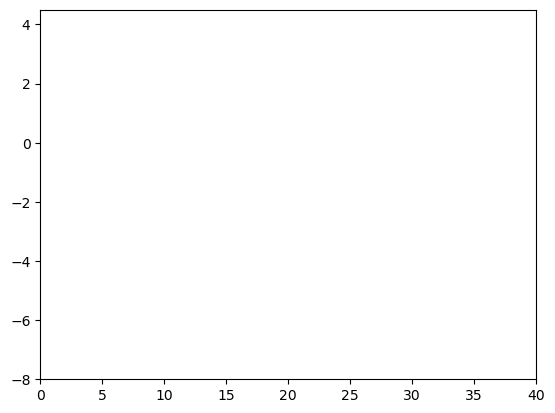

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0,40), ylim=(-8,4.5))
line, = ax.plot([], [],'o')
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x=xdata[i]
    y=ydata[i]
    line.set_data(x, y)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nsteps, interval=20, blit=False)
anim.save('Planetas.mp4', fps=30)